# Data Aug 2

## Start

FileNotFoundError: [Errno 2] No such file or directory: 'Line a'

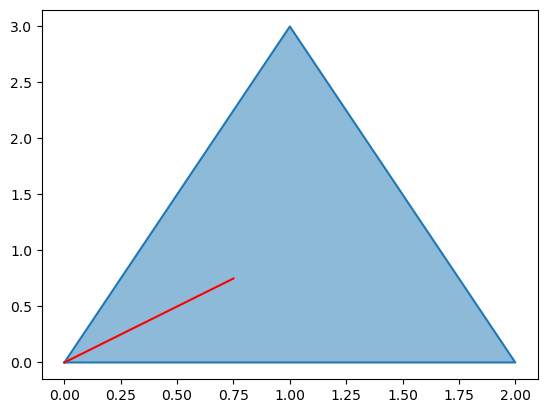

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

# Plot the triangle
plt.plot(df['X'], df['Y'])
plt.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Plot the lines and store the touch points
for i in range(3):
    line_x = [df['X'][i], center_x]
    line_y = [df['Y'][i], center_y]
    plt.plot(line_x, line_y, color='red')

    touch_point = (line_x[1], line_y[1])
    line_coords.append(touch_point)

    # Label the lines
    label = f'Line {chr(97+i)}'
    ab = AnnotationBbox(OffsetImage(plt.imread(label), zoom=0.05), (line_x[1], line_y[1]), frameon=False)
    plt.gca().add_artist(ab)

# Plot the center point
plt.plot(center_x, center_y, 'ko', label='Center')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangle with Center Lines')
plt.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")


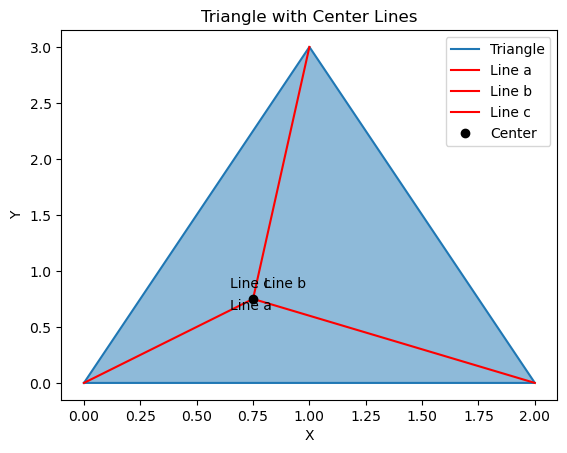

Coordinates where the lines touch the triangle's edges:
Line a: (0.75, 0.75)
Line b: (0.75, 0.75)
Line c: (0.75, 0.75)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Define offsets for label placement to avoid overlap
offsets = np.array([[-0.1, -0.1], [0.05, 0.1], [-0.1, 0.1]])

# Plot the lines and store the touch points
for i in range(3):
    line_x = [df['X'][i], center_x]
    line_y = [df['Y'][i], center_y]
    ax.plot(line_x, line_y, color='red', label=f'Line {chr(97+i)}')

    touch_point = (line_x[1], line_y[1])
    line_coords.append(touch_point)

    # Label the lines with offset to avoid overlap
    ax.text(line_x[1]+offsets[i, 0], line_y[1]+offsets[i, 1], f'Line {chr(97+i)}')

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")



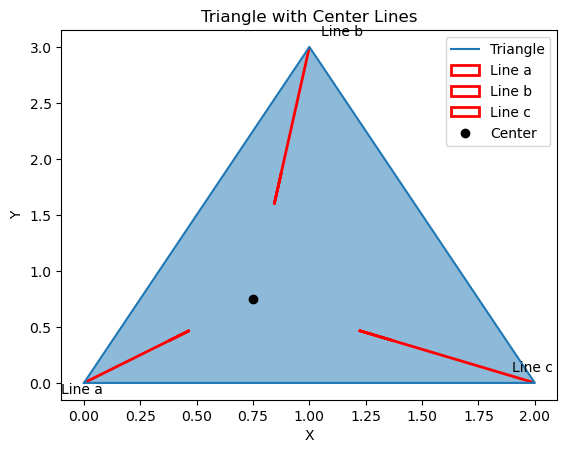

Coordinates where the lines touch the triangle's edges:
Line a: (0, 0)
Line b: (1, 3)
Line c: (2, 0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Define offsets for label placement to avoid overlap
offsets = np.array([[-0.1, -0.1], [0.05, 0.1], [-0.1, 0.1]])

# Create the curved lines
for i in range(3):
    # Create a path for the Bezier curve
    verts = [(df['X'][i], df['Y'][i]), (center_x, center_y), ((df['X'][i] + center_x)/2, (df['Y'][i] + center_y)/2)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
    path = patches.Path(verts, codes)

    # Create a patch and add it to the plot
    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

    touch_point = (df['X'][i], df['Y'][i])
    line_coords.append(touch_point)

    # Label the lines with offset to avoid overlap
    ax.text(df['X'][i]+offsets[i, 0], df['Y'][i]+offsets[i, 1], f'Line {chr(97+i)}')

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")


Nice attempt

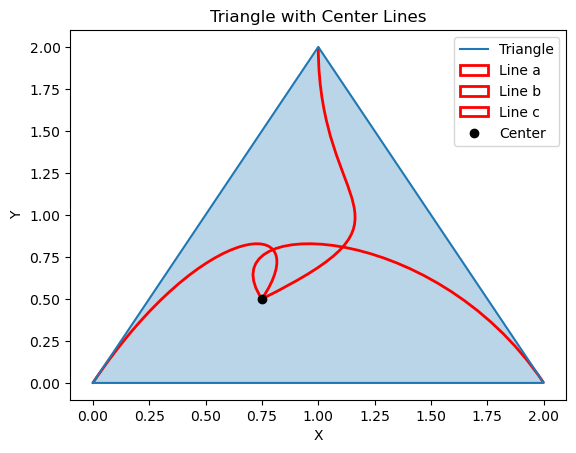

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 2, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


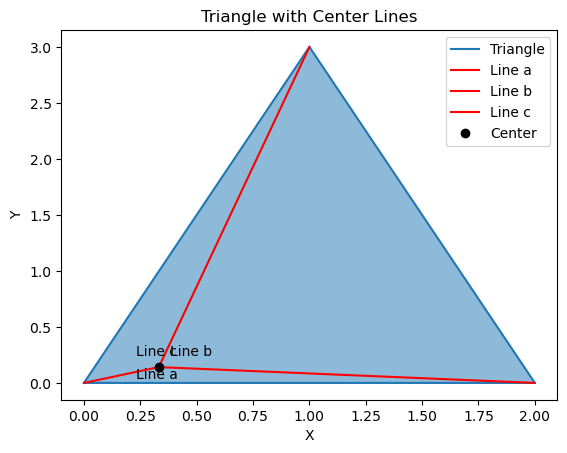

Coordinates where the lines touch the triangle's edges:
Line a: (0.3319716229593299, 0.14120970295322866)
Line b: (0.3319716229593299, 0.14120970295322866)
Line c: (0.3319716229593299, 0.14120970295322866)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Generate a random point within the triangle
random_point = [np.random.uniform(0, 2), np.random.uniform(0, 3)]
center_x, center_y = random_point

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Define offsets for label placement to avoid overlap
offsets = np.array([[-0.1, -0.1], [0.05, 0.1], [-0.1, 0.1]])

# Plot the lines and store the touch points
for i in range(3):
    line_x = [df['X'][i], center_x]
    line_y = [df['Y'][i], center_y]
    ax.plot(line_x, line_y, color='red', label=f'Line {chr(97+i)}')

    touch_point = (line_x[1], line_y[1])
    line_coords.append(touch_point)

    # Label the lines with offset to avoid overlap
    ax.text(line_x[1]+offsets[i, 0], line_y[1]+offsets[i, 1], f'Line {chr(97+i)}')

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")


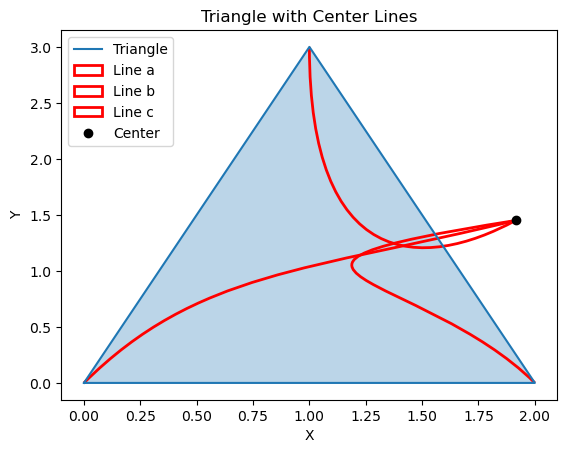

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Generate a random point within the triangle
random_point = [np.random.uniform(0, 2), np.random.uniform(0, 3)]
center_x, center_y = random_point

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


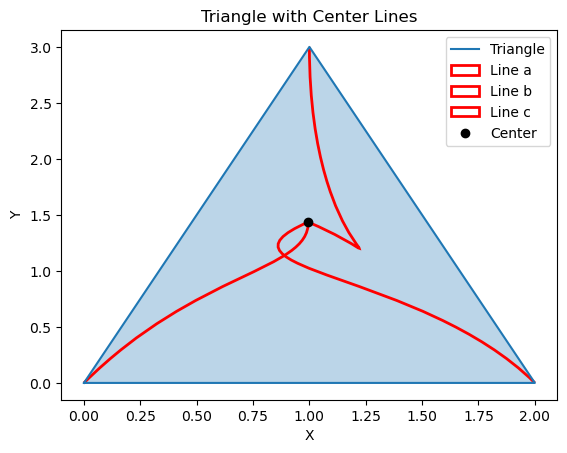

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Barycentric coordinates for the random point
weights = np.random.uniform(size=3)
weights /= weights.sum()

# Generate a random point within the triangle
random_point = [weights[0]*df['X'][0] + weights[1]*df['X'][1] + weights[2]*df['X'][2], 
                weights[0]*df['Y'][0] + weights[1]*df['Y'][1] + weights[2]*df['Y'][2]]
center_x, center_y = random_point

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


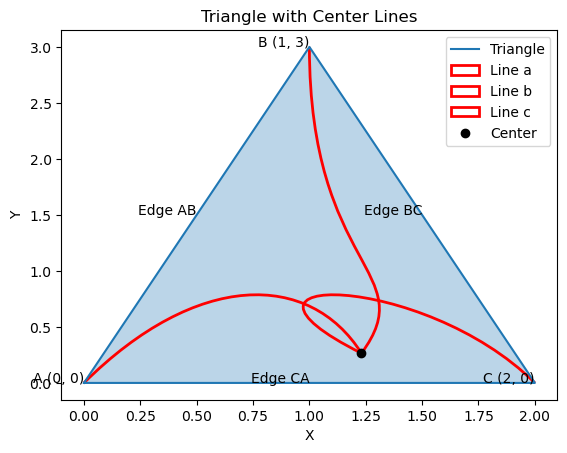

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Barycentric coordinates for the random point
weights = np.random.uniform(size=3)
weights /= weights.sum()

# Generate a random point within the triangle
random_point = [weights[0]*df['X'][0] + weights[1]*df['X'][1] + weights[2]*df['X'][2], 
                weights[0]*df['Y'][0] + weights[1]*df['Y'][1] + weights[2]*df['Y'][2]]
center_x, center_y = random_point

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

# Add labels for corners (vertices)
vertices = ['A', 'B', 'C']
for i in range(3):
    ax.text(df['X'][i], df['Y'][i], f'{vertices[i]} ({df["X"][i]}, {df["Y"][i]})', fontsize=10, ha='right')

# Add labels for edges (sides)
edges = ['AB', 'BC', 'CA']
for i in range(3):
    mid_x = (df['X'][i] + df['X'][(i+1)%3]) / 2
    mid_y = (df['Y'][i] + df['Y'][(i+1)%3]) / 2
    ax.text(mid_x, mid_y, f'Edge {edges[i]}', fontsize=10, ha='right')

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


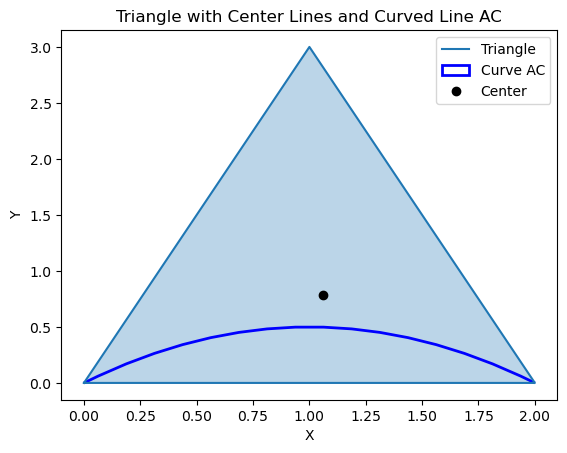

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Barycentric coordinates for the random point
weights = np.random.uniform(size=3)
weights /= weights.sum()

# Generate a random point within the triangle
random_point = [weights[0]*df['X'][0] + weights[1]*df['X'][1] + weights[2]*df['X'][2], 
                weights[0]*df['Y'][0] + weights[1]*df['Y'][1] + weights[2]*df['Y'][2]]
center_x, center_y = random_point

# Control points for the Bezier curve from A to C, adjust as needed
control_point = (1, 1)

# Define a quadratic Bezier curve using points A, control point, and C
verts = [(df['X'][0], df['Y'][0]), control_point, (df['X'][2], df['Y'][2])]
codes = [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
path = patches.Path(verts, codes)

patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='blue', label='Curve AC')
ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines and Curved Line AC')
ax.legend()
plt.show()


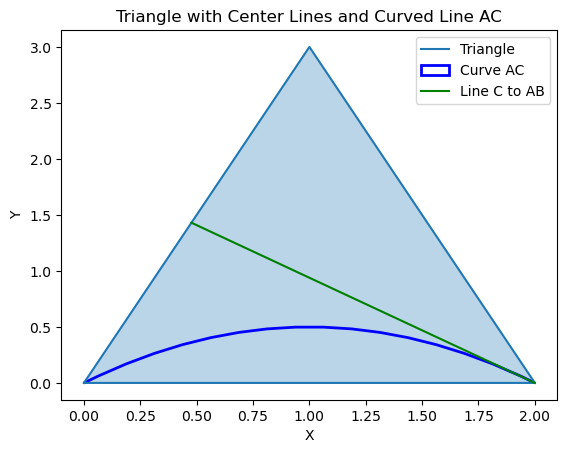

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Control points for the Bezier curve from A to C, adjust as needed
control_point = (1, 1)

# Define a quadratic Bezier curve using points A, control point, and C
verts = [(df['X'][0], df['Y'][0]), control_point, (df['X'][2], df['Y'][2])]
codes = [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
path = patches.Path(verts, codes)

patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='blue', label='Curve AC')
ax.add_patch(patch)

# Generate a random point on edge AB
random_weight = np.random.uniform()
random_point_AB = [random_weight*df['X'][0] + (1-random_weight)*df['X'][1], 
                   random_weight*df['Y'][0] + (1-random_weight)*df['Y'][1]]

# Add a line from point C to the random point on edge AB
ax.plot([df['X'][2], random_point_AB[0]], [df['Y'][2], random_point_AB[1]], color='green', label='Line C to AB')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines and Curved Line AC')
ax.legend()
plt.show()


# Trenary plot

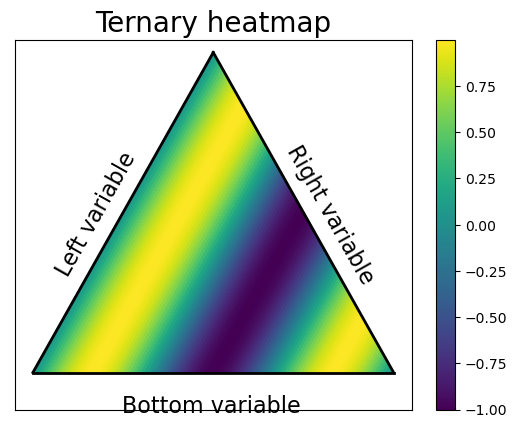

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the position.
def color_function(coords):
    x, y, z = coords
    return np.sin(3 * np.pi * x)

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)

# Draw the heatmap.
tax.heatmapf(color_function, boundary=True, style="triangular")

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("Left variable", fontsize=16)
tax.right_axis_label("Right variable", fontsize=16)
tax.bottom_axis_label("Bottom variable", fontsize=16)
tax.set_title("Ternary heatmap", fontsize=20)

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Show the plot.
ternary.plt.show()


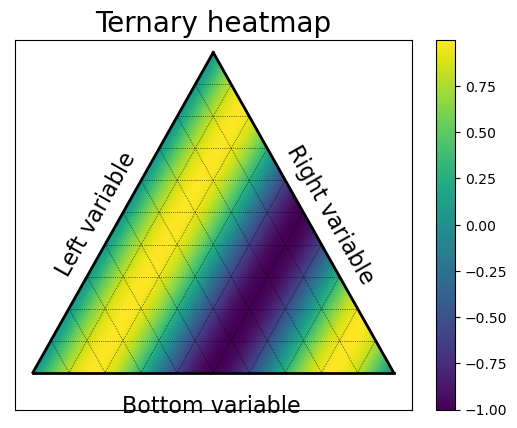

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the position.
def color_function(coords):
    x, y, z = coords
    return np.sin(3 * np.pi * x)

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)

# Draw the heatmap.
tax.heatmapf(color_function, boundary=True, style="triangular")

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("Left variable", fontsize=16)
tax.right_axis_label("Right variable", fontsize=16)
tax.bottom_axis_label("Bottom variable", fontsize=16)
tax.set_title("Ternary heatmap", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Show the plot.
ternary.plt.show()


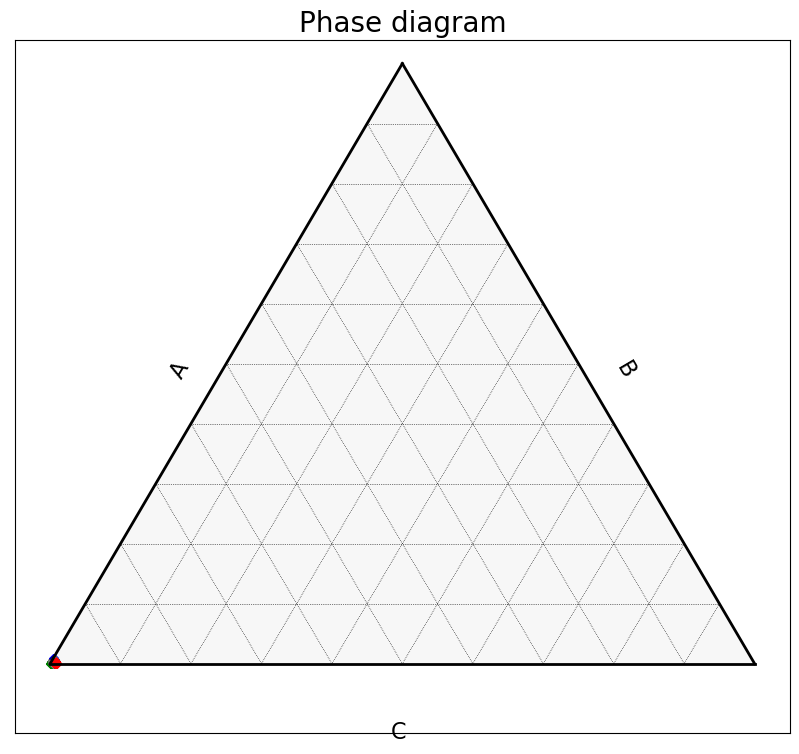

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the concentration.
def color_function(point):
    A, B, C = point
    if A > 0.6:
        return "red"  # Solid phase of A
    elif B > 0.7:
        return "blue"  # Solid phase of B
    elif C > 0.65:
        return "green"  # Solid phase of C
    else:
        return "gray"  # Liquid phase

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)
figure.set_size_inches(10, 9)

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("A", fontsize=16)
tax.right_axis_label("B", fontsize=16)
tax.bottom_axis_label("C", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i in range(101):
    for j in range(101 - i):
        k = 100 - i - j
        point = [i / 100, j / 100, k / 100]
        color = color_function(point)
        tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
ternary.plt.show()


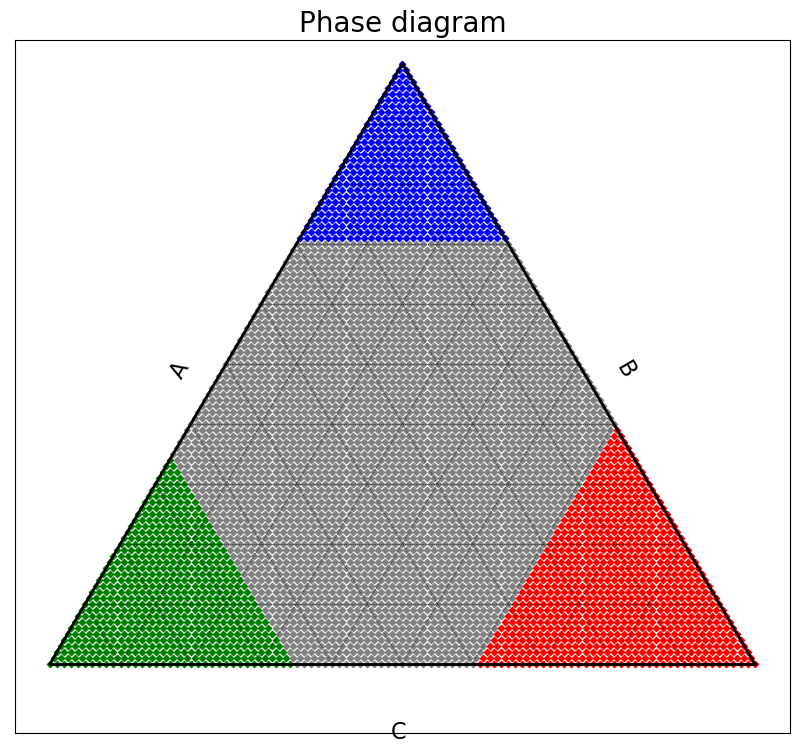

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the concentration.
def color_function(point):
    A, B, C = point
    if A > 0.6:
        return "red"  # Solid phase of A
    elif B > 0.7:
        return "blue"  # Solid phase of B
    elif C > 0.65:
        return "green"  # Solid phase of C
    else:
        return "gray"  # Liquid phase

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)
figure.set_size_inches(10, 9)

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("A", fontsize=16)
tax.right_axis_label("B", fontsize=16)
tax.bottom_axis_label("C", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i in range(101):
    for j in range(101 - i):
        k = 100 - i - j
        point = [i, j, k]  # Values are in the range of 0-100.
        color = color_function([v/100 for v in point])  # Normalize for color function.
        tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
ternary.plt.show()


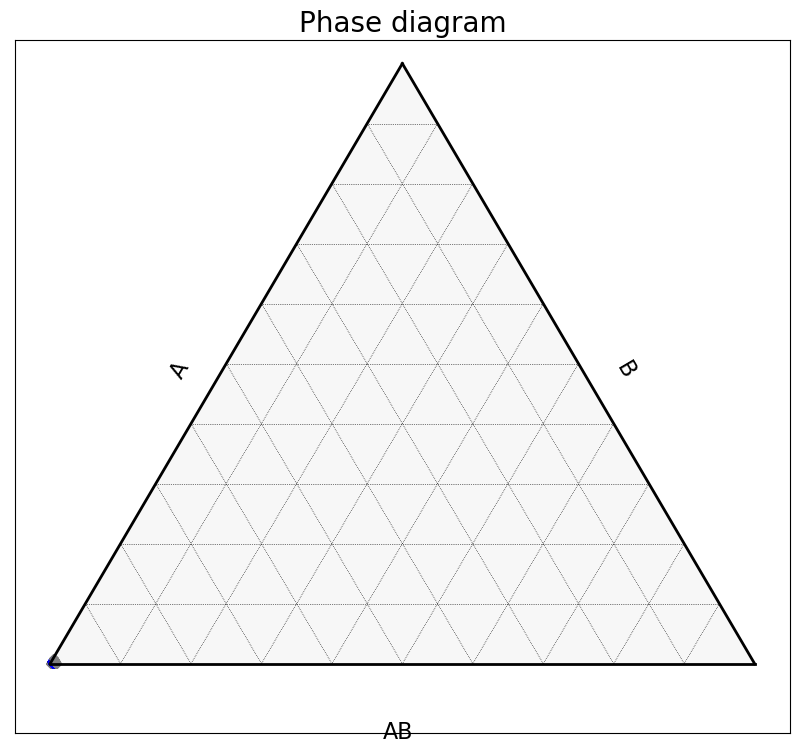

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Define a function for the phase based on the concentration.
def phase_function(point):
    A, B, AB = point
    if 0.3 <= AB <= 0.7:
        return "blue"  # Solid phase
    else:
        return "gray"  # Liquid phase

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)
figure.set_size_inches(10, 9)

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("A", fontsize=16)
tax.right_axis_label("B", fontsize=16)
tax.bottom_axis_label("AB", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i in range(101):
    for j in range(101):
        if i + j <= 100:
            k = 100 - i - j
            point = [i / 100, j / 100, k / 100]  # Values are normalized to 0-1.
            color = phase_function(point)
            tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
ternary.plt.show()


NameError: name 'product' is not defined

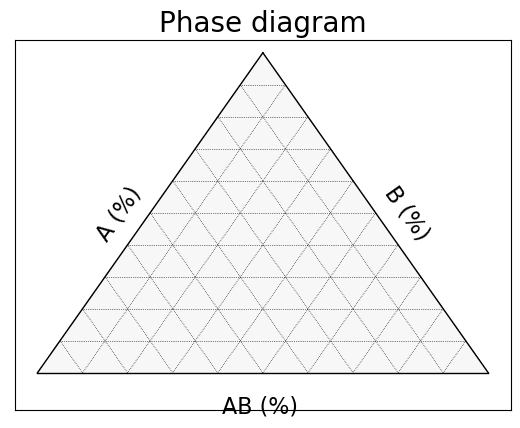

In [ ]:
import ternary
import matplotlib.pyplot as plt
import numpy as np

# Create a new ternary figure.
scale = 100
figure, tax = ternary.figure(scale=scale)

# Define a function for the phase based on the concentration.
def phase_function(point):
    A, B, AB = point
    # Let's assume that the solid phase forms at 30% - 70% of AB
    if 30 <= AB <= 70:
        return "blue"  # Solid phase
    else:
        return "gray"  # Liquid phase

# Decorate the figure
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=10, color="black")
tax.left_axis_label("A (%)", fontsize=16)
tax.right_axis_label("B (%)", fontsize=16)
tax.bottom_axis_label("AB (%)", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i, j in product(range(scale+1), range(scale+1)):
    if i + j <= scale:
        k = scale - i - j
        point = [i, j, k]
        color = phase_function(point)
        tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
plt.show()


TypeError: 'float' object cannot be interpreted as an integer

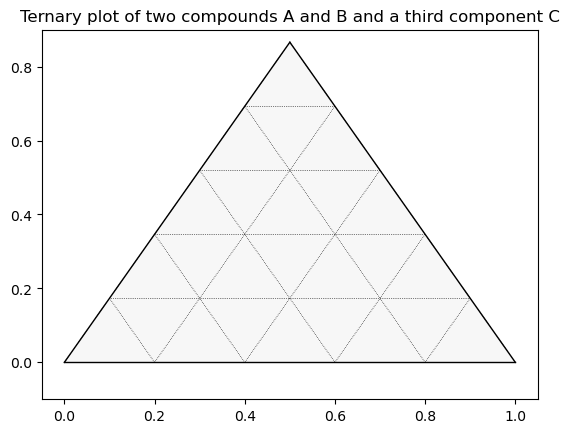

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Function to be plotted
def score_function(point):
    A, B, C = point
    if A > 0.6:
        return 1    # Phase 1
    elif B > 0.6:
        return 2    # Phase 2
    else:
        return 0    # No dominant phase

# Create a new ternary plot
figure, tax = ternary.figure(scale=1.0)

# Set labels for the three axes
tax.set_title("Ternary plot of two compounds A and B and a third component C")
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=0.2, color="black")

# Plotting
tax.heatmapf(score_function, boundary=True, style="hexagonal", cmap=plt.cm.get_cmap('Greys'))

# Set axis labels
tax.left_axis_label("A", offset=0.14, fontsize=12, position=(-0.1,0.5,0,1))
tax.right_axis_label("B", offset=0.14, fontsize=12, position=(1.1,0.5,0,1))
tax.bottom_axis_label("C", offset=0.14, fontsize=12)

# Show the plot
ternary.plt.show()


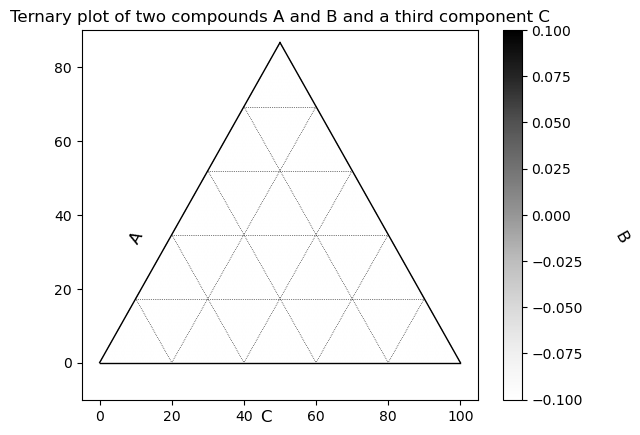

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Function to be plotted
def score_function(point):
    A, B, C = point
    A, B, C = A/100, B/100, C/100  # adjust the scale from 100 to 1
    if A > 0.6:
        return 1    # Phase 1
    elif B > 0.6:
        return 2    # Phase 2
    else:
        return 0    # No dominant phase

# Create a new ternary plot
figure, tax = ternary.figure(scale=100)

# Set labels for the three axes
tax.set_title("Ternary plot of two compounds A and B and a third component C")
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=20, color="black")

# Plotting
tax.heatmapf(score_function, boundary=True, style="hexagonal", cmap=plt.cm.get_cmap('Greys'))

# Set axis labels
tax.left_axis_label("A", offset=0.14, fontsize=12, position=(-0.1,0.5,0,1))
tax.right_axis_label("B", offset=0.14, fontsize=12, position=(1.1,0.5,0,1))
tax.bottom_axis_label("C", offset=0.14, fontsize=12)

# Show the plot
ternary.plt.show()


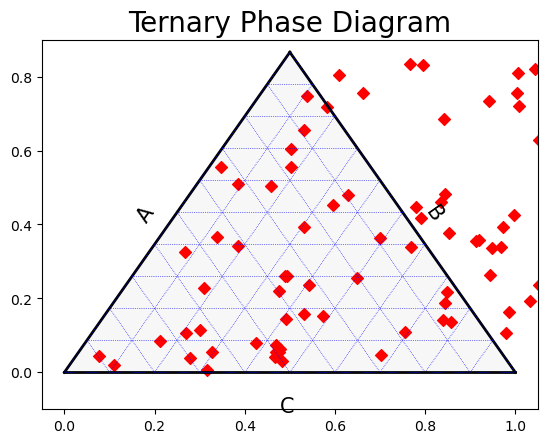

In [ ]:
import ternary
import numpy as np

# Create a new figure
fig, tax = ternary.figure(scale=1.0)

# Set labels
tax.set_title("Ternary Phase Diagram", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")
tax.left_axis_label("A", fontsize=15)
tax.right_axis_label("B", fontsize=15)
tax.bottom_axis_label("C", fontsize=15)

# Generate data
A = np.random.rand(100)
B = np.random.rand(100)
C = 1.0 - (A + B)
points = list(zip(A,B,C))

# Scatter plot
tax.scatter(points, marker='D', color='red')

# Show plot
ternary.plt.show()


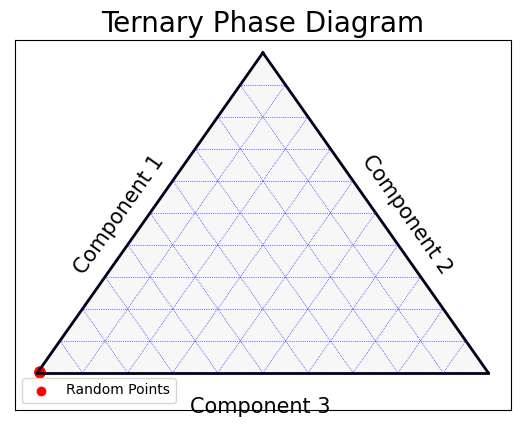

In [ ]:
import ternary
import matplotlib.pyplot as plt
import numpy as np

# Define the size of the figure
figure, tax = ternary.figure(scale=100)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10, color="blue")

# Set Labels
tax.set_title("Ternary Phase Diagram", fontsize=20)
tax.left_axis_label("Component 1", fontsize=15)
tax.right_axis_label("Component 2", fontsize=15)
tax.bottom_axis_label("Component 3", fontsize=15)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

# Randomly generate points for demonstration
points = np.random.rand(20, 3) * 100
points /= points.sum(axis=1)[:, None]

# Plot points
tax.scatter(points, marker='o', color='red', label="Random Points")

tax.legend()
plt.show()


AttributeError: module 'ternary' has no attribute 'random_points'

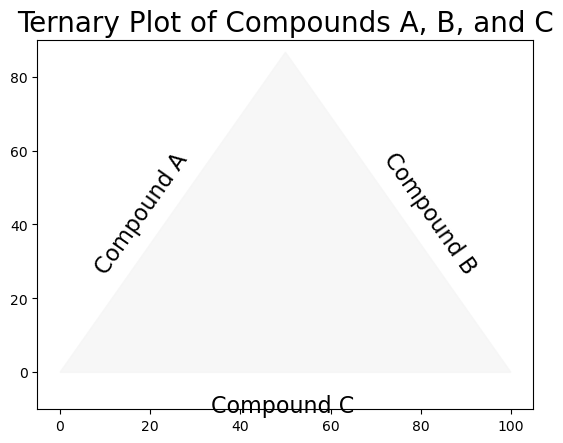

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = ternary.random_points(25, scale=100)

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Show the plot
    ternary.plt.show()

# Call the function to create the plot
create_ternary_plot()


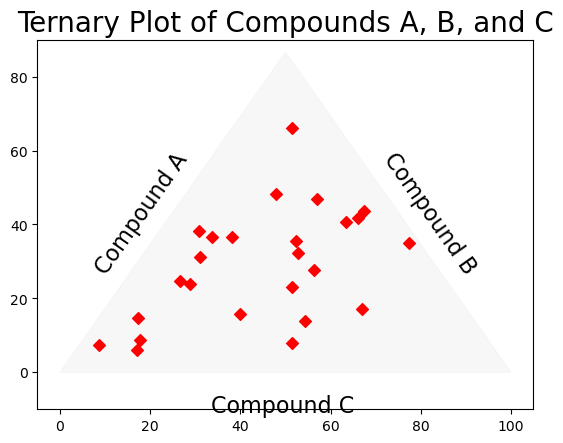

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


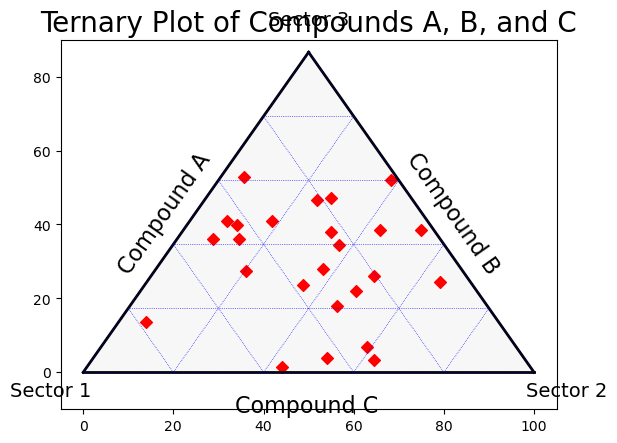

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=20)

    # Label the sectors
    tax.left_corner_label("Sector 1", fontsize=14)
    tax.right_corner_label("Sector 2", fontsize=14)
    tax.top_corner_label("Sector 3", fontsize=14)

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


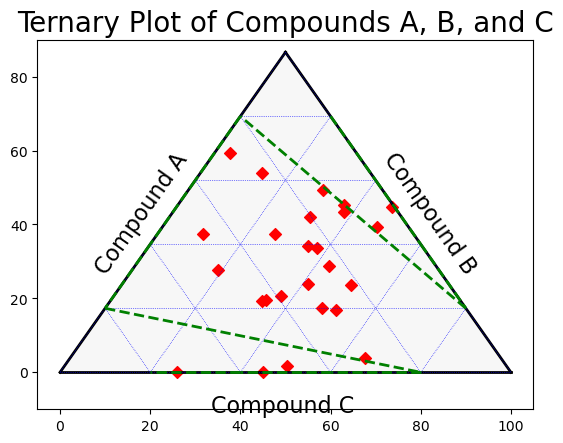

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='green', linestyle="--")

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


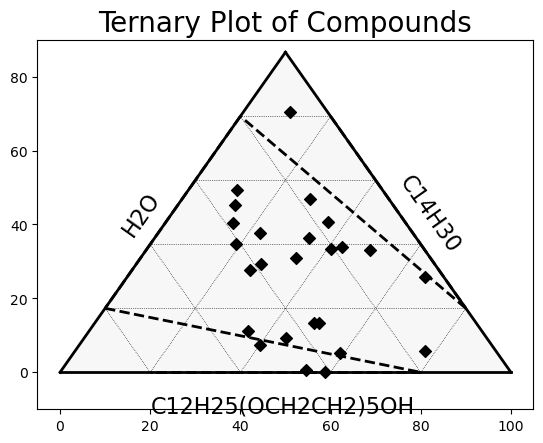

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="--")

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


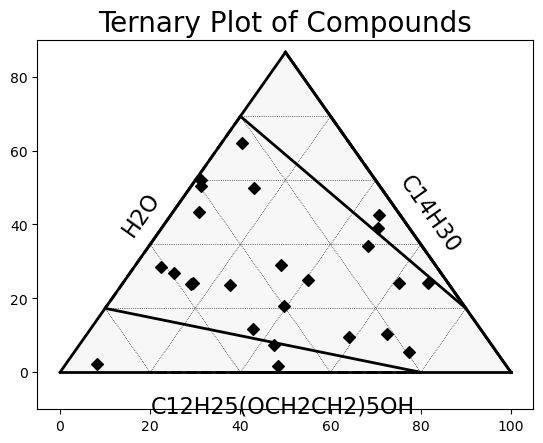

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        if i % 2 == 0:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="--")
        else:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="-")

    # Draw a curved line
    points = [(i, 100 - i, 0) for i in range(0, 101, 5)]
    tax.plot(points, linewidth=2.0, color='black')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


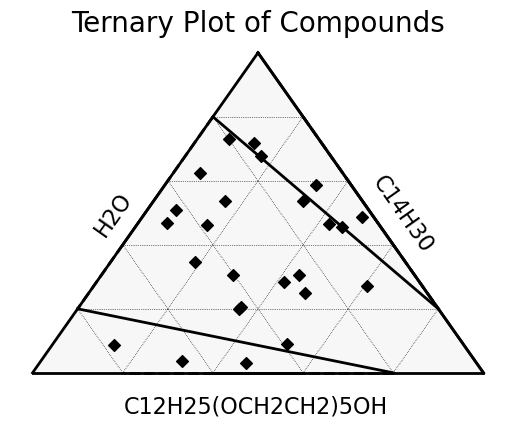

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        if i % 2 == 0:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="--")
        else:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="-")

    # Draw a curved line
    points = [(i, 100 - i, 0) for i in range(0, 101, 5)]
    tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


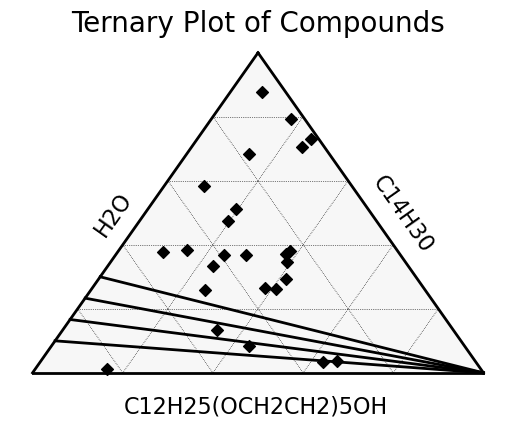

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for i in np.linspace(10, 30, 4):
        points = [(j, i*(1 - j/100), 100 - i*(1 - j/100) - j) for j in np.linspace(0, 100, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


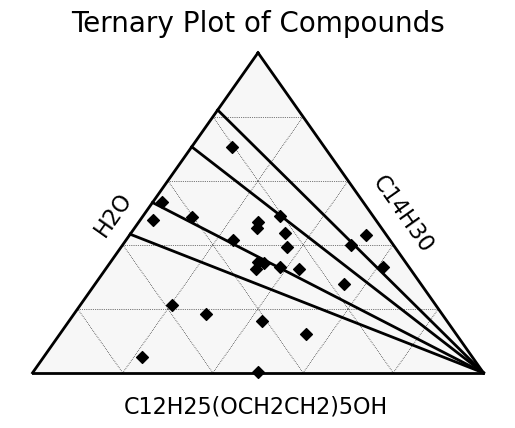

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        i = np.random.uniform(10, 90)
        points = [(j, i*(1 - j/100), 100 - i*(1 - j/100) - j) for j in np.linspace(0, 100, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


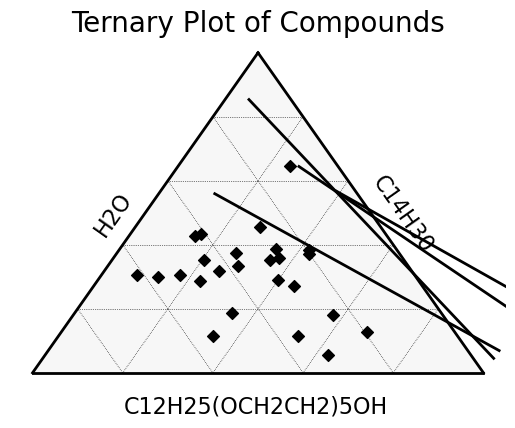

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        i = np.random.uniform(10, 90)
        start = np.random.uniform(0, 100 - i)
        points = [(j + start, i*(1 - j/100), 100 - i*(1 - j/100) - j - start) for j in np.linspace(0, 100 - start, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


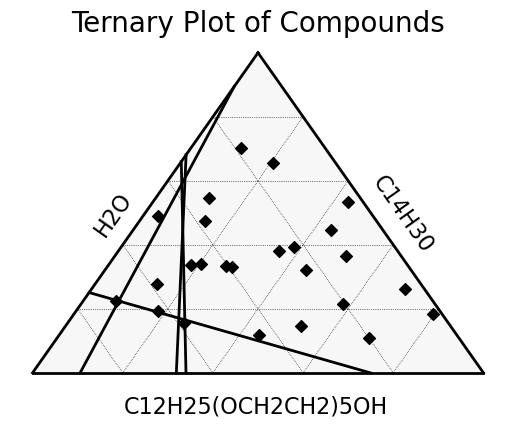

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        start = np.random.uniform(10, 90)
        end = 100 - start
        points = [(j, start*(1 - j/end), 100 - start*(1 - j/end) - j) for j in np.linspace(0, end, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


# best result so far

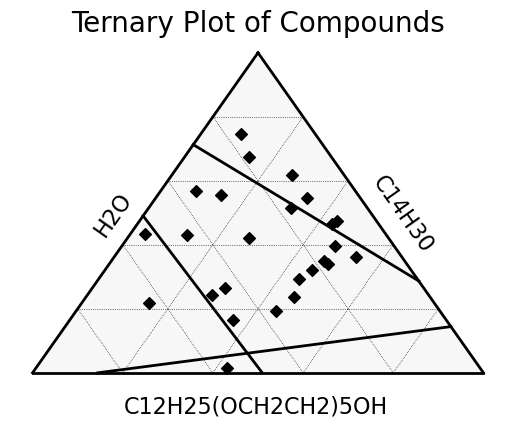

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for edge in [(0, 100), (100, 0), (50, 50)]:
        start = np.random.uniform(10, 90)
        end = 100 - start
        if edge == (0, 100):
            points = [(j, start*(1 - j/end), 100 - start*(1 - j/end) - j) for j in np.linspace(0, end, 100)]
        elif edge == (100, 0):
            points = [(100 - start*(1 - j/end) - j, j, start*(1 - j/end)) for j in np.linspace(0, end, 100)]
        else:
            points = [(start*(1 - j/end), 100 - start*(1 - j/end) - j, j) for j in np.linspace(0, end, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


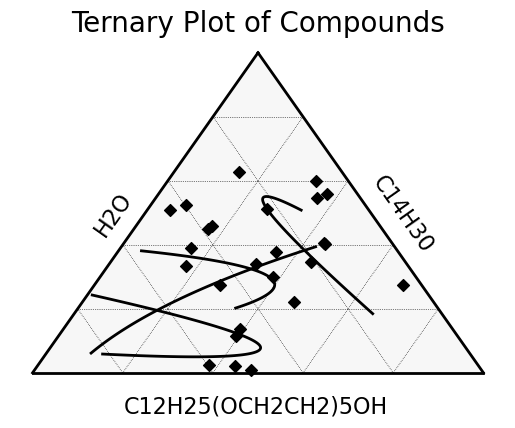

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()a

# Call the function to create the plot
create_ternary_plot()


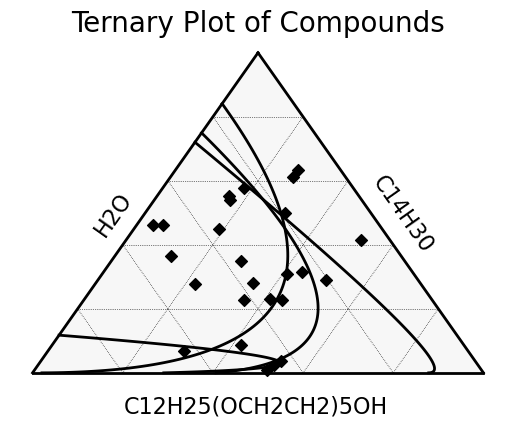

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first and last points are on the edges of the triangle
        control_points[0] = [0, np.random.rand() * 100]
        control_points[-1] = [100 - np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


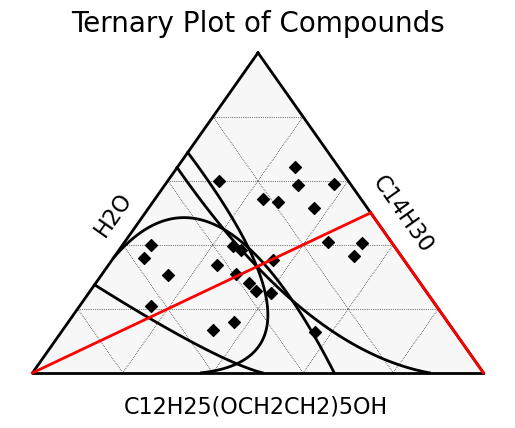

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first and last points are on the edges of the triangle
        control_points[0] = [0, np.random.rand() * 100]
        control_points[-1] = [100 - np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Draw two lines that start at the bottom corners and meet in the middle
    middle_point = [50, 50, 0]
    tax.line(middle_point, [0, 0, 100], linewidth=2.0, color='red')
    tax.line(middle_point, [100, 0, 0], linewidth=2.0, color='red')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


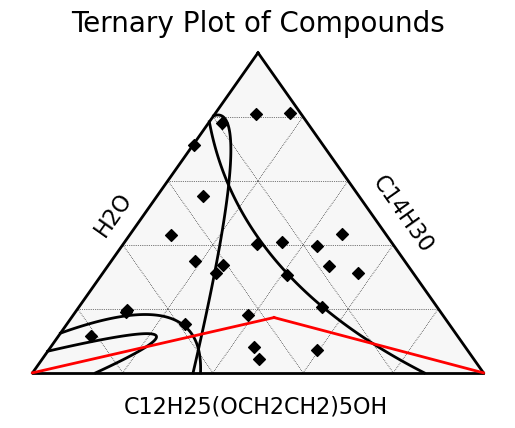

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first and last points are on the edges of the triangle
        control_points[0] = [0, np.random.rand() * 100]
        control_points[-1] = [100 - np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Draw two lines that start at the bottom corners and meet at a random point in the middle
    middle_point = [np.random.rand()*100, np.random.rand()*100, 0]
    middle_point[1] = middle_point[1] * (100 - middle_point[0]) / 100  # Ensure the point is within the triangle
    tax.line(middle_point, [0, 0, 100], linewidth=2.0, color='red')
    tax.line(middle_point, [100, 0, 0], linewidth=2.0, color='red')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plots
    plt.show()

# Call the function to create the plot
create_ternary_plot()


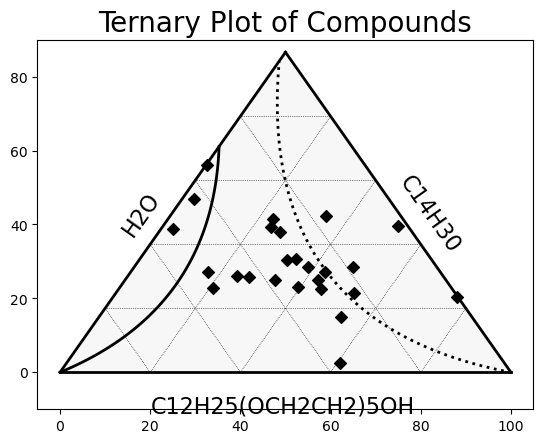

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = np.random.randint(2, 5)  # Random number of curves between 2 and 4
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the curve with a solid or dotted line
        if np.random.rand() < 0.5:
            tax.plot(points, linewidth=2.0, color='black')  # Solid line
        else:
            tax.plot(points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


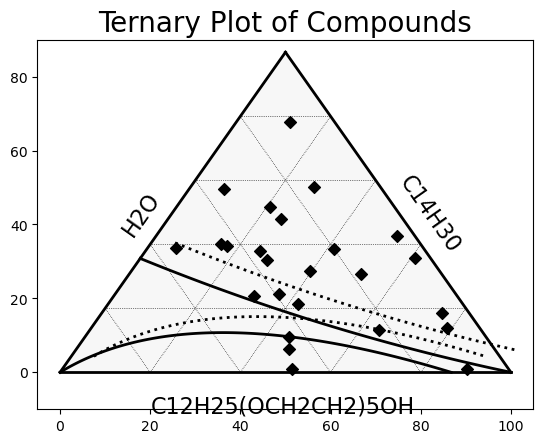

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset points
def offset_points(points, offset=1):
    return [(x+offset, y+offset, z) for x, y, z in points if z-offset>=0 and y+offset<=100 and x+offset<=100]

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 2
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Offset points
        offset_pts = offset_points(points, offset=5)
        
        # Plot the offset dotted line
        tax.plot(offset_pts, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


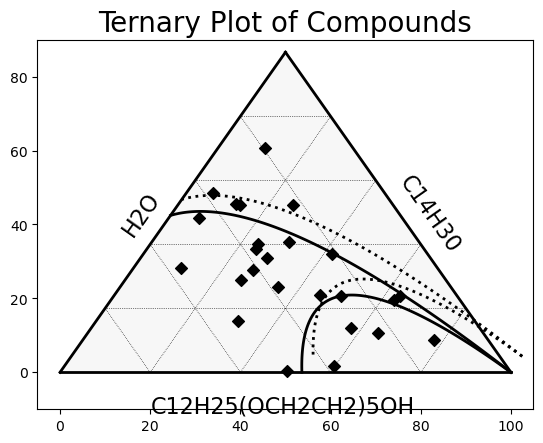

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset points
def offset_points(points, offset=1):
    return [(x, y+offset, z) for x, y, z in points if z+offset<=100 and y+offset<=100 and x<=100]

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 2
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Function to offset points
        def offset_points(points, offset=1):
        return [(x, y, max(0, z - offset)) for x, y, z in points]
        
        # Plot the offset dotted line
        tax.plot(offset_pts, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


# BEST V2

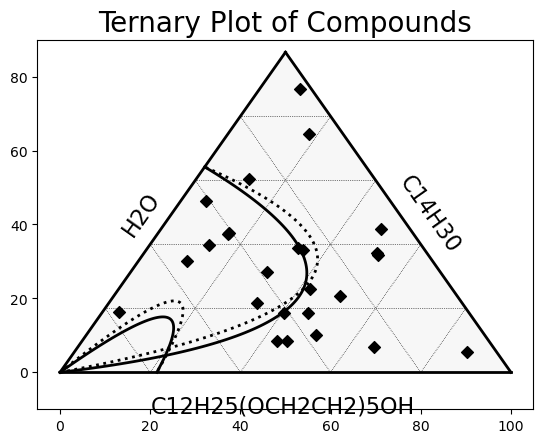

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)
    offset_points[1:-1, 1] += offset  # Add offset to y-coordinate of middle control point(s)
    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 2
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)
        
        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)
        
        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]
        
        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


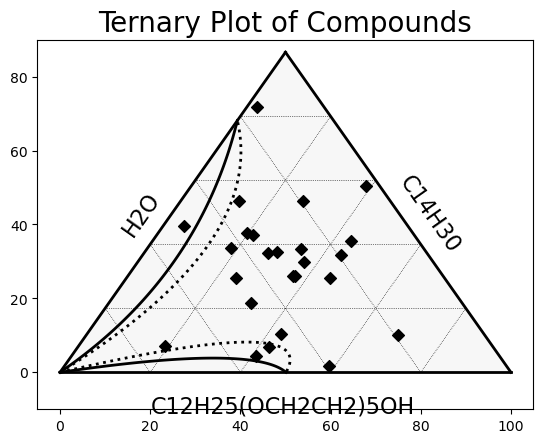

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 2
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)
        
        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)
        
        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]
        
        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


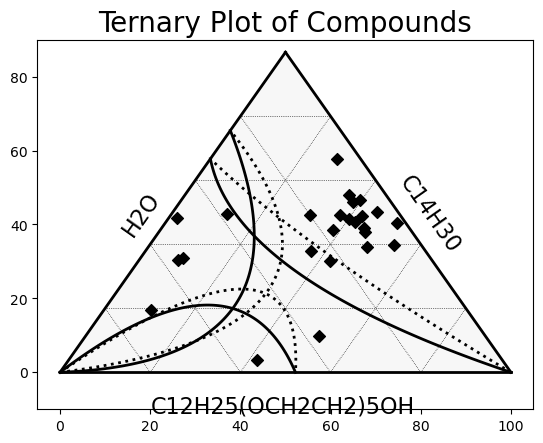

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 3  # Increase this to generate more curves
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


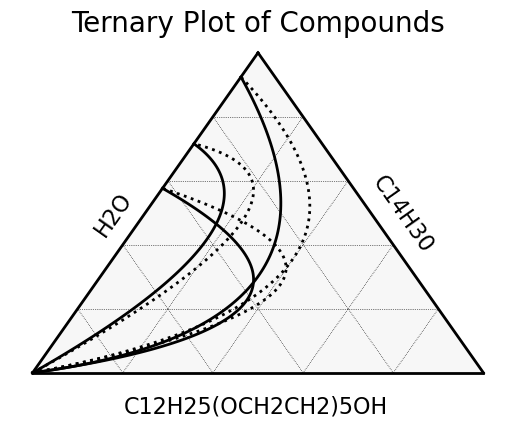

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


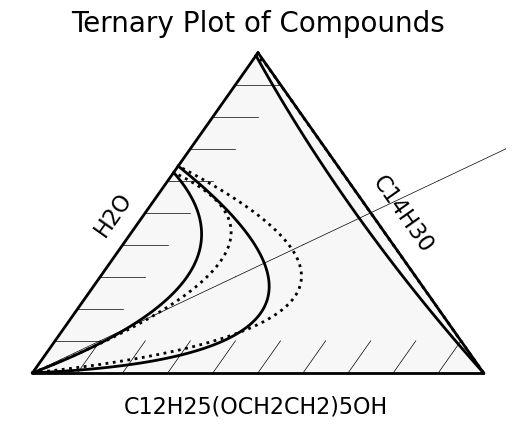

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(10, 100, 10):
        tax.line((i, 0, 100-i), (i, 10, 100-i-10), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((0, i, 100-i), (10, i, 100-i-10), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((100-i, 100-i, 0), (100-i-10, 100-i-10, 20), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


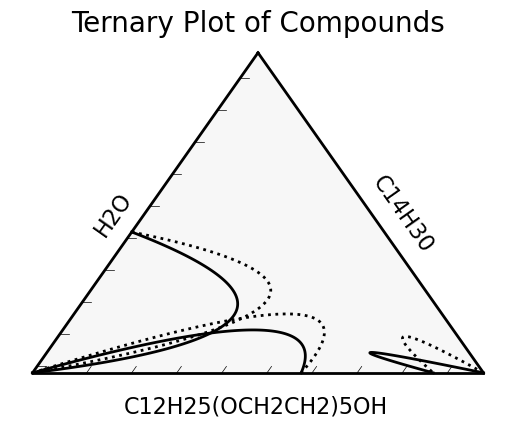

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((0, i, 100-i), (2, i, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((i, 100-i, 0), (i+2, 100-i-2, 0), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


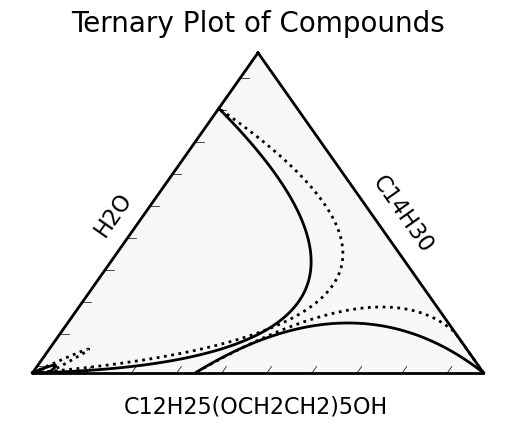

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((0, i, 100-i), (2, i, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((i, 100-i, 0), (i+2, 100-i-2, 0), linewidth=0.5, color='black', linestyle="-", zorder=1)
        tax.line((100-i, i, 0), (100-i-2, i+2, 0), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


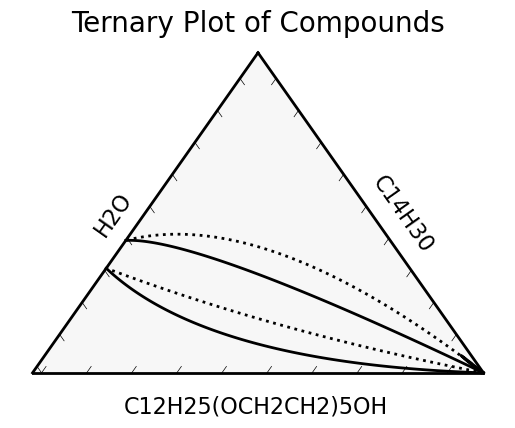

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


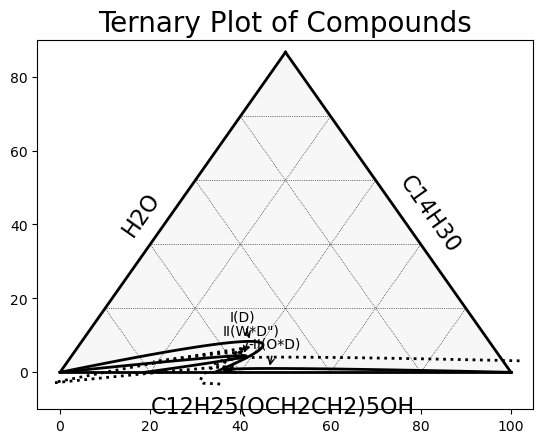

In [ ]:
import matplotlib.text as mtext

# Define labels
labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

# Modify the create_ternary_plot function to include labels
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)
    
    
    

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        control_points[0] = [np.random.choice([0, 100]), 0]

        # Ensure the last point is on a random edge of the triangle
        control_points[-1] = [np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(-15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Create offset points for the dotted line
        offset_pts = offset_points(points, offset=5)

        # Plot the offset dotted line
        tax.plot(offset_pts, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


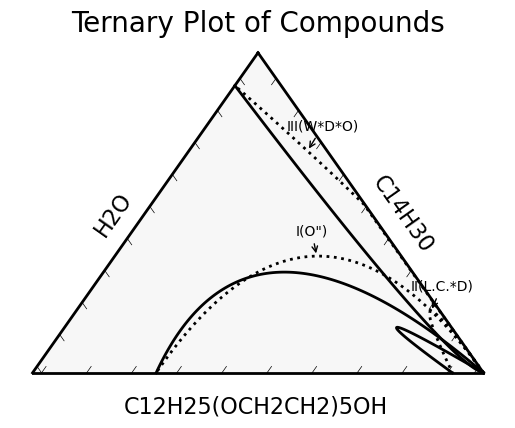

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = offset_points[len(offset_points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(-15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


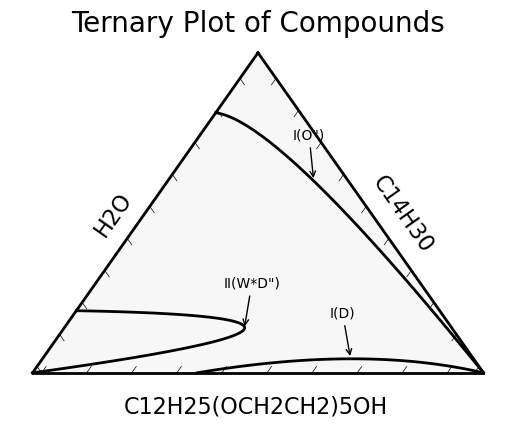

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(-15, 30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


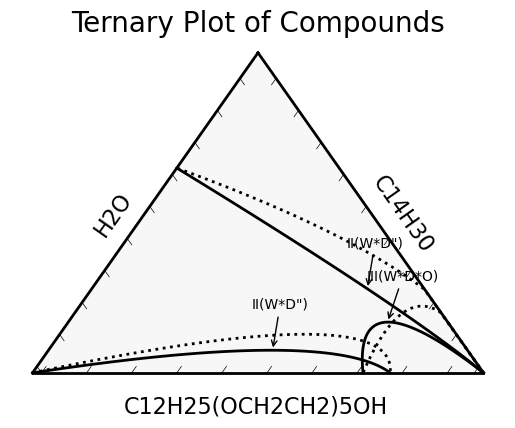

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(-15, 30),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


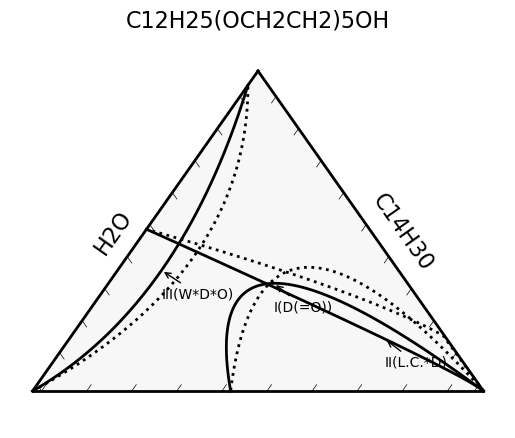

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


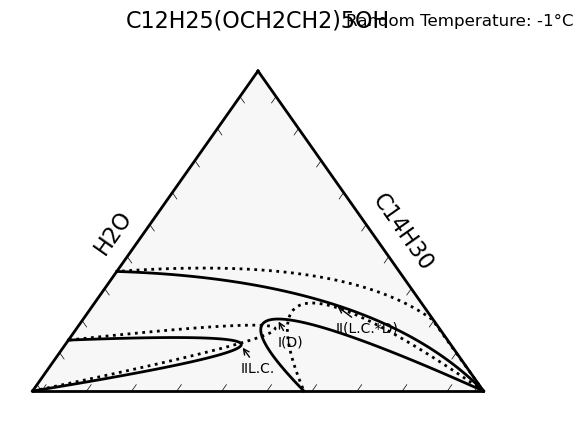

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Add the random temperature annotation
    random_temp = np.random.randint(-35, 36)
    tax.ax.text(120, 100, f"Random Temperature: {random_temp}°C", ha='right', va='center', fontsize=12)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


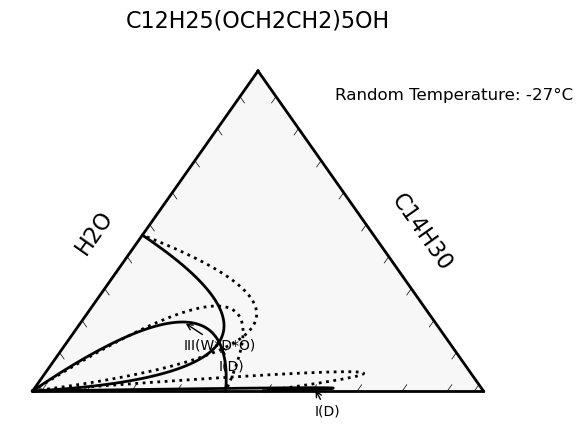

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Add the random temperature annotation
    random_temp = np.random.randint(-35, 36)
    tax.ax.text(120, 80, f"Random Temperature: {random_temp}°C", ha='right', va='center', fontsize=12)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


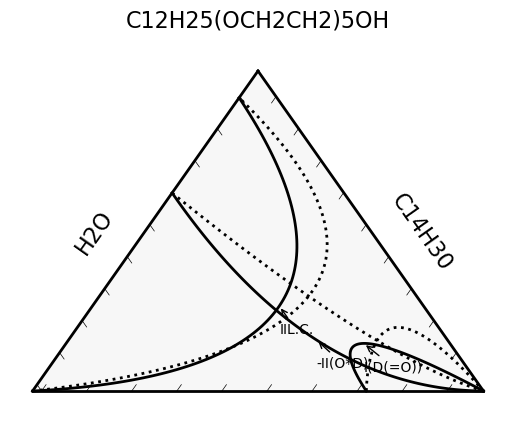

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


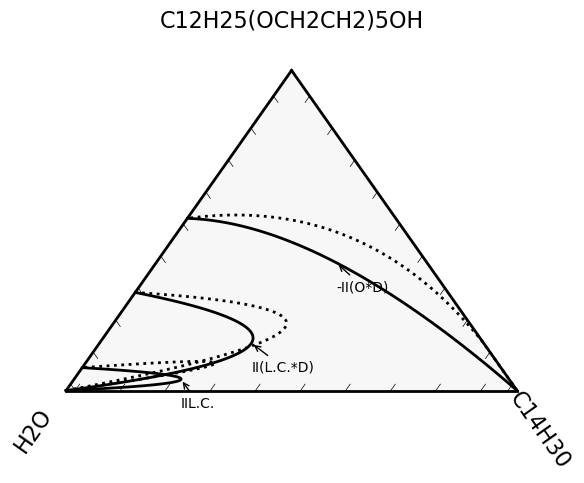

In [ ]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(0.0, -0.02))
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.0, -0.02))

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


# Final

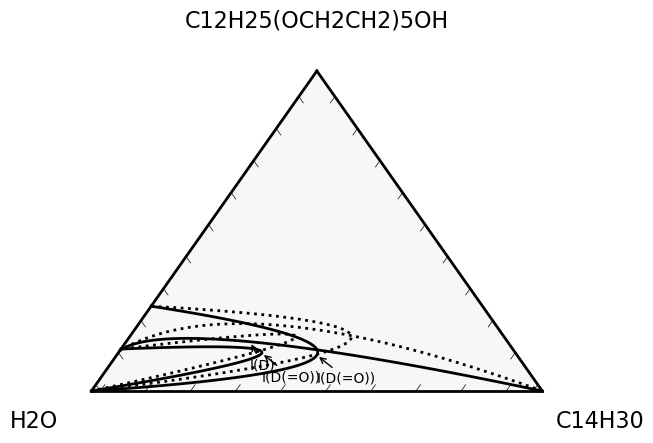

In [28]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plota
    plt.show()

# Call the function to create the plot
create_ternary_plot()


##### 1. Prepare the dataset:

- Gather a dataset of input graphs (black and white text and lines) along with their corresponding desired output graphs (colored sections).
Ensure you have a sufficient number of examples for training and evaluation purposes.

#### 2. Data preprocessing:

- Convert the input graphs into a format that can be fed into your model. This may involve converting the images into a suitable pixel representation or any other preprocessing steps necessary for your specific model.

##### 3. Split the dataset:

- Divide your dataset into training and evaluation sets. The training set will be used to train your model, while the evaluation set will be used to assess its performance.

##### 4. Design and train a model:

- Choose an appropriate machine learning model or neural network architecture to perform the task of generating output graphs from the input graphs. This could be a convolutional neural network (CNN) or any other model suitable for image processing tasks.
Train your model using the training dataset. During training, the model will learn to map the input graphs to the corresponding output graphs.

##### 5. Validate and fine-tune the model:

- Evaluate the performance of your trained model on the evaluation dataset. Calculate metrics such as accuracy, precision, recall, or any other relevant evaluation measures.
If the performance is not satisfactory, you may need to adjust the model architecture, hyperparameters, or data augmentation techniques to improve the results.
Fine-tune the model iteratively until you achieve the desired level of performance.

##### 6. Generate output graphs:

- Once your model is trained and performs well on the evaluation dataset, you can use it to generate output graphs from new input graphs.
Provide the new input graphs to the trained model, and it will produce the corresponding output graphs with different colored sections.

##### 7. Post-processing:

- Apply any necessary post-processing steps to enhance or refine the generated output graphs as required.
This could involve smoothing the colored sections, adjusting colors, or any other modifications based on the specific requirements of your project.

In [ ]:
def ternary_to_cartesian(points):
    x = 0.5 * (2 * points[1] + points[2]) / (points[0] + points[1] + points[2])
    y = points[2] / (points[0] + points[1] + points[2])
    return (x, y)

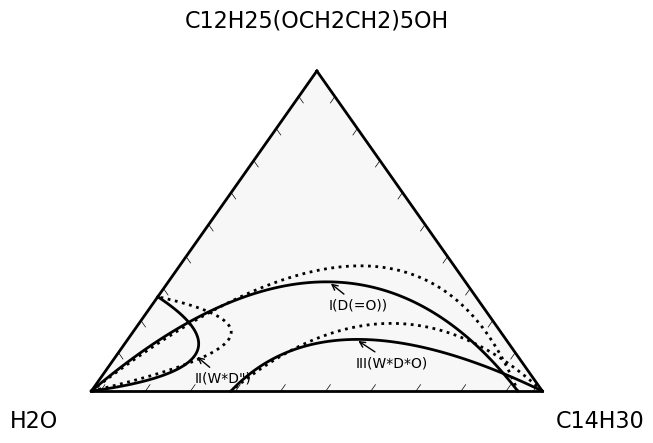

In [124]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import matplotlib.patches as patches

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
    
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

        # Fill the area between the solid line and the edge of the triangle
        # Convert points to Cartesian coordinates for fill_between
        cartesian_points = [ternary_to_cartesian(p) for p in points]
        xs, ys = zip(*cartesian_points)
        plt.fill_between(xs, ys, color='b', alpha=0.4)

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


In [10]:
def ternary_to_cartesian(point):
    """Converts ternary coordinates to Cartesian coordinates."""
    # Convert ternary coordinates (a, b, c) to Cartesian coordinates (x, y)
    a, b, c = point
    x = 0.5 * (2 * b + c) / (a + b + c)
    y = np.sqrt(3) * 0.5 * c / (a + b + c)
    return x, y

AttributeError: 'TernaryAxesSubplot' object has no attribute 'fill'

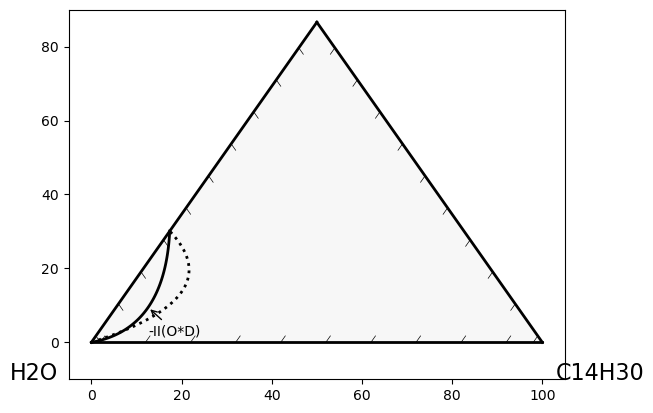

In [13]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Define colors
    colors = ['b', 'g', 'r', 'c', 'm','y']

    # Draw curved phase lines
    num_curves = 3
    for i in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

       # Fill the area between the solid line and the edge of the triangle
        tax.fill(points, color='b', alpha=0.4)
    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()

# re-create in plotly

In [14]:
import pandas as pd
import plotly.graph_objects as go

# example data
dummy_data=[
    {"var1":0.7, "var2":0.15, "var3":0.15, "comp":"option1"},
    {"var1":0.15, "var2":0.7, "var3":0.15, "comp":"option1"},
    {"var1":0.15, "var2":0.15, "var3":0.7, "comp":"option1"},
    {"var1":0.7, "var2":0.15, "var3":0.15, "comp":"option1"},
    {"var1":0.6, "var2":0.2, "var3":0.2, "comp":"option2"},
    {"var1":0.2, "var2":0.6, "var3":0.2, "comp":"option2"},
    {"var1":0.2, "var2":0.2, "var3":0.6, "comp":"option2"},
    {"var1":0.6, "var2":0.2, "var3":0.2, "comp":"option2"}
]

table = pd.DataFrame.from_dict(dummy_data)

fig = go.Figure()

table1 = table[table['comp'] == 'option1']
fig.add_trace(go.Scatterternary(
    text=table1['comp'],
    a=table1['var1'],
    b=table1['var2'],
    c=table1['var3'],
    mode='lines',
    line_color='red',
    name='option1'
))

table2 = table[table['comp'] == 'option2']
fig.add_trace(go.Scatterternary(
    text=table2['comp'],
    a=table2['var1'],
    b=table2['var2'],
    c=table2['var3'],
    mode='lines',
    line_color='black',
    name='option2'
))

fig.update_layout({
    'title': 'Ternary Line Plot',
    'ternary':
        {
        'sum':1,
        'aaxis':{'title': 'A', 'min': 0.01, 'linewidth':2, 'ticks':'outside' },
        'baxis':{'title': 'B', 'min': 0.01, 'linewidth':2, 'ticks':'outside' },
        'caxis':{'title': 'C', 'min': 0.01, 'linewidth':2, 'ticks':'outside' }
    },
    'showlegend': True
})

fig.show()


In [15]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron")
fig.show()

# V2

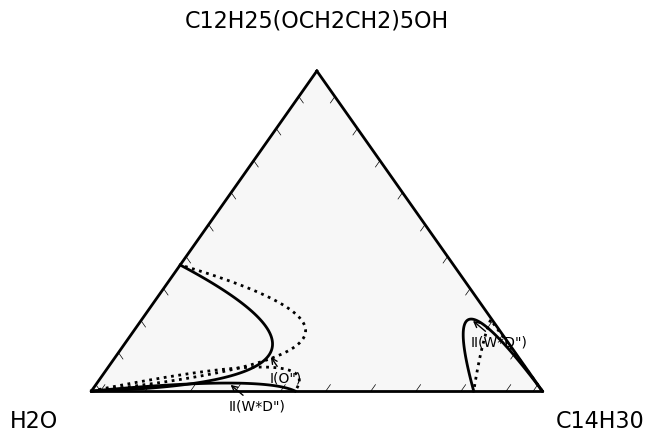

In [16]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


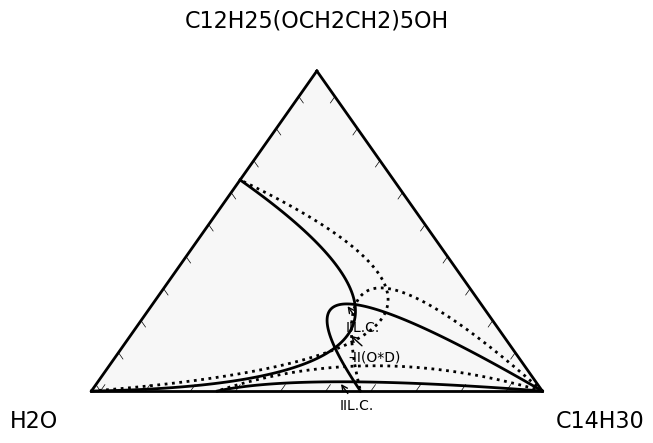

In [22]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge
            
            

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plota
    plt.show()

# Call the function to create the plot
create_ternary_plot()


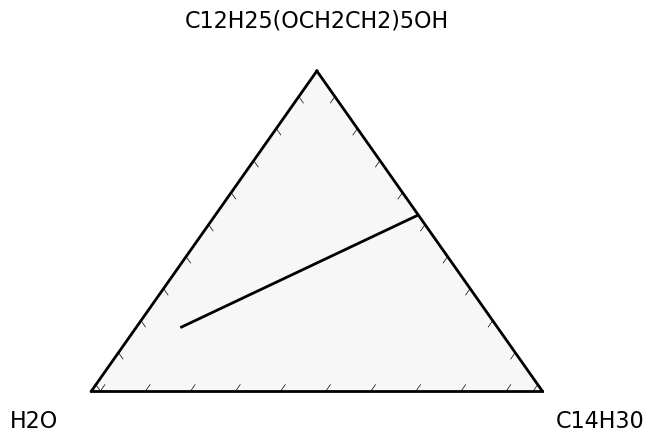

In [25]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define your actual control points
    actual_points = np.array([[10, 20], [30, 40], [50, 60]])

    # Generate the Bezier curve
    curve = bezier_curve(actual_points)

    # Convert the curve points to ternary coordinates
    points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

    # Plot the solid line
    tax.plot(points, linewidth=2.0, color='black')  # Solid line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


# V3

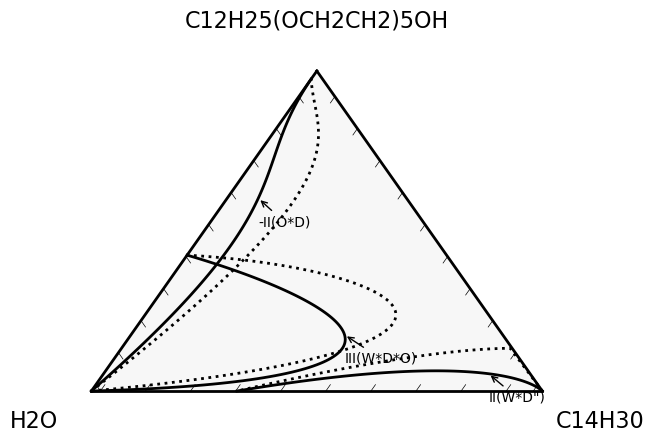

In [1]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb


# Function to generate control points for a Bezier curve
def generate_control_points():
    # Generate two random points within the triangle
    points = np.random.rand(2, 2) * 100
    points[:, 1] = points[:, 1] * (100 - points[:, 0]) / 100

    # Ensure the first point is on the bottom left or right corner of the triangle
    if np.random.rand() < 0.5:
        points = np.vstack(([0, 0], points))  # Bottom left corner
    else:
        points = np.vstack(([100, 0], points))  # Bottom right corner

    # Ensure the last point is on a random edge of the triangle
    if np.random.rand() < 0.5:
        points = np.vstack((points, [np.random.rand() * 100, 0]))  # Bottom edge
    else:
        points = np.vstack((points, [0, np.random.rand() * 100]))  # Left edge

    return points

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        
       # Generate control points for the Bezier curve
        control_points = generate_control_points()

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plota
    plt.show()

# Call the function to create the plot
create_ternary_plot()


# V4

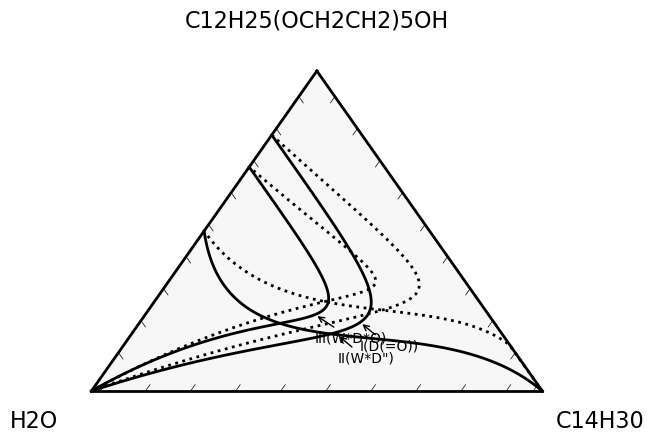

In [3]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb


# Function to generate control points for a Bezier curve
# Function to generate control points for a Bezier curve
def generate_control_points(i):
    # Predefined control points
    control_points_set = [
        [[0, 0], [30, 40], [70, 0], [0, 70]],  # Control points for the first curve
        [[100, 0], [60, 30], [30, 0], [0, 50]],  # Control points for the second curve
        [[0, 0], [50, 30], [80, 0], [0, 80]]  # Control points for the third curve
    ]

    return control_points_set[i]

    # Ensure the first point is on the bottom left or right corner of the triangle
    if np.random.rand() < 0.5:
        points = np.vstack(([0, 0], points))  # Bottom left corner
    else:
        points = np.vstack(([100, 0], points))  # Bottom right corner

    # Ensure the last point is on a random edge of the triangle
    if np.random.rand() < 0.5:
        points = np.vstack((points, [np.random.rand() * 100, 0]))  # Bottom edge
    else:
        points = np.vstack((points, [0, np.random.rand() * 100]))  # Left edge

    return points

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for i in range(num_curves):
        
        # Generate control points for the Bezier curve
        control_points = generate_control_points(i)

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plota
    plt.show()

# Call the function to create the plot
create_ternary_plot()


In [4]:
import plotly.graph_objects as go

# Make data for the plot
trace1 = go.Scatterternary(
    a=[15, 30, 15, 15],
    b=[20, 20, 30, 20],
    c=[65, 50, 55, 65],
    mode='lines',
    line=dict(color='blue', width=2),
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.2)'
)

trace2 = go.Scatterternary(
    a=[60, 40, 50, 60],
    b=[20, 20, 30, 20],
    c=[20, 40, 20, 20],
    mode='lines',
    line=dict(color='red', width=2),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.2)'
)

# Add the data to the plot
data = [trace1, trace2]

# Make the layout for the plot
layout = go.Layout(
    title=dict(text='Filled Ternary Plot'),
    ternary=dict(
        sum=100,
        aaxis_title="X",
        baxis_title="Y",
        caxis_title="Z",
    )
)

# Make the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


# Ouput Final

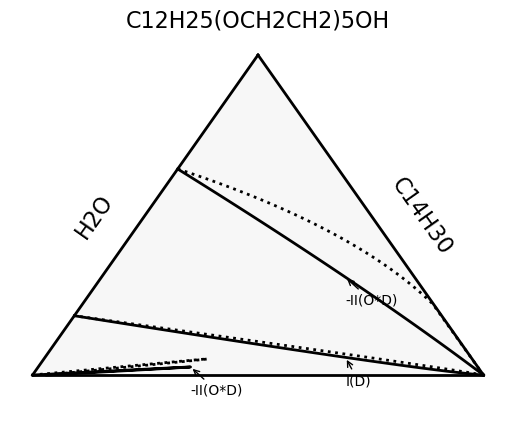

In [6]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]
        
        # Cap the offsets to avoid going beyond the ternary plot
        offset = min(offset, x, y, 100-x-y)

        offset_points[i, 0] += offset
        offset_points[i, 1] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'))

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.top_corner_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot
    plt.savefig('input_plot_aug.png')

# Call the function to create the plot
create_ternary_plot()


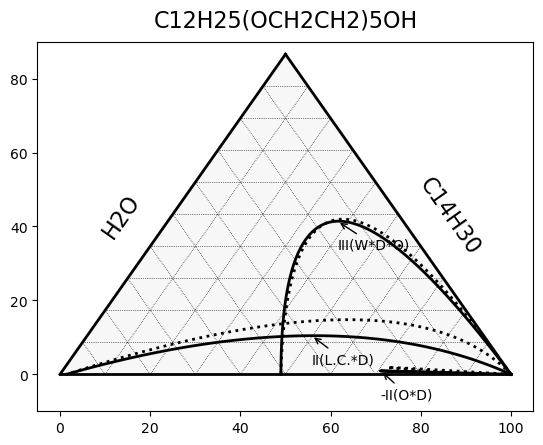

In [7]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]
        
        # Cap the offsets to avoid going beyond the ternary plot
        offset = min(offset, x, y, 100-x-y)

        offset_points[i, 0] += offset
        offset_points[i, 1] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw gridlines
    tax.gridlines(multiple=10, color="black")

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.top_corner_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Show the plot and save it as a .png file
    plt.savefig('output_plot.png')

# Call the function to create the plot
create_ternary_plot()


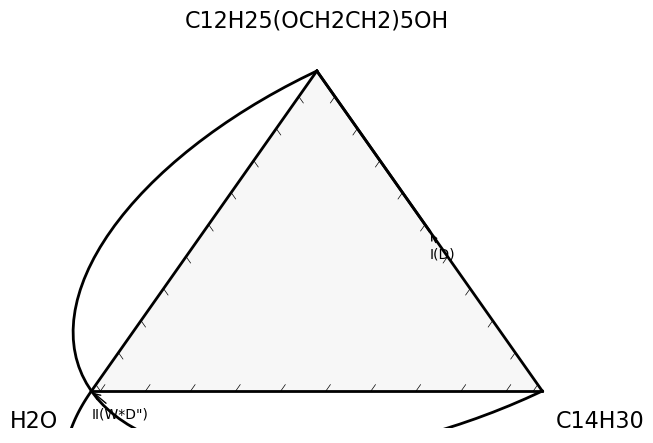

In [8]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.transforms import Affine2D

# Function to create a circular arc
def circular_arc(center, radius, start_angle, end_angle, n=100):
    t = np.linspace(start_angle, end_angle, num=n)
    curve = np.column_stack([radius * np.cos(t) + center[0], radius * np.sin(t) + center[1]])
    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw circular arcs starting from each edge
    centers = [(50, 0), (0, 50), (50, 50)]  # Centers of the circles
    radii = [50, 50, np.sqrt(2)*50]  # Radii of the circles
    start_angles = [np.pi, np.pi/2, np.pi/4]  # Start angles
    end_angles = [3*np.pi/2, 0, 7*np.pi/4]  # End angles
    for i in range(3):
        # Generate the circular arc
        curve = circular_arc(centers[i], radii[i], start_angles[i], end_angles[i])

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


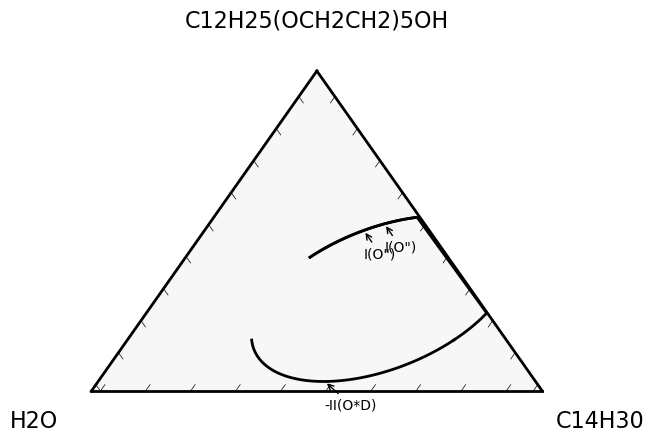

In [10]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create a circular arc
def circular_arc(center, radius, start_angle, end_angle, n=100):
    t = np.linspace(start_angle, end_angle, num=n)
    curve = np.column_stack([radius * np.cos(t) + center[0], radius * np.sin(t) + center[1]])
    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw circular arcs starting from the centroid of the triangle
    center = (50, 50/np.sqrt(3))  # Center of the circle
    radius = 50 * np.sqrt(2 - np.sqrt(3))  # Radius of the circle
    start_angles = [5*np.pi/6, -np.pi/6, 7*np.pi/6]  # Start angles
    end_angles = [np.pi/6, 5*np.pi/6, 11*np.pi/6]  # End angles
    for i in range(3):
        # Generate the circular arc
        curve = circular_arc(center, radius, start_angles[i], end_angles[i])

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


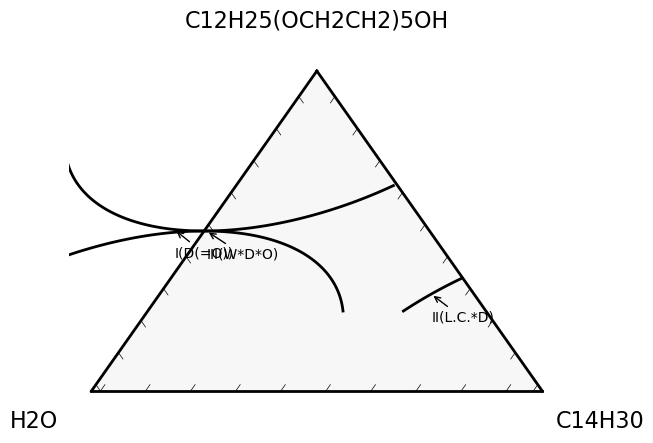

In [11]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create a circular arc
def circular_arc(center, radius, start_angle, end_angle, n=100):
    t = np.linspace(start_angle, end_angle, num=n)
    curve = np.column_stack([radius * np.cos(t) + center[0], radius * np.sin(t) + center[1]])
    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw circular arcs starting from the corner edges of the triangle
    start_points = [(0, 0), (100, 0), (0, 100)]  # Start points for the arcs
    center = (50, 50 / np.sqrt(3))  # Center of the circle
    radius = 50  # Radius of the circle
    start_angles = [5 * np.pi / 6, np.pi / 6, 11 * np.pi / 6]  # Start angles
    end_angles = [np.pi / 6, 5 * np.pi / 6, 7 * np.pi / 6]  # End angles
    for i in range(3):
        # Generate the circular arc
        curve = circular_arc(start_points[i], radius, start_angles[i], end_angles[i])

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Calculate the midpoint for the label
        midpoint = points[len(points) // 2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


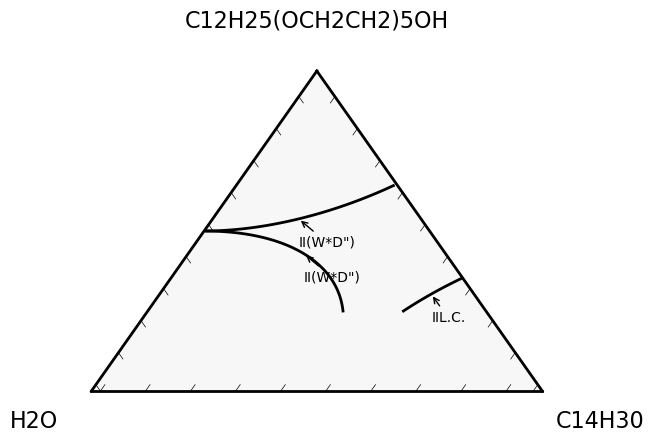

In [12]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Function to create a circular arc
def circular_arc(center, radius, start_angle, end_angle, n=100):
    t = np.linspace(start_angle, end_angle, num=n)
    curve = np.column_stack([radius * np.cos(t) + center[0], radius * np.sin(t) + center[1]])
    
    # Create a Path object for the triangle boundary
    boundary_path = Path([(0, 0), (100, 0), (0, 100), (0, 0)])
    
    # Clip the curve points outside the triangle boundary
    curve_clipped = curve[boundary_path.contains_points(curve)]
    
    return curve_clipped

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw circular arcs starting from the corner edges of the triangle
    start_points = [(0, 0), (100, 0), (0, 100)]  # Start points for the arcs
    center = (50, 50 / np.sqrt(3))  # Center of the circle
    radius = 50  # Radius of the circle
    start_angles = [5 * np.pi / 6, np.pi / 6, 11 * np.pi / 6]  # Start angles
    end_angles = [np.pi / 6, 5 * np.pi / 6, 7 * np.pi / 6]  # End angles
    for i in range(3):
        # Generate the circular arc
        curve = circular_arc(start_points[i], radius, start_angles[i], end_angles[i])

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Calculate the midpoint for the label
        midpoint = points[len(points) // 2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


ValueError: too many values to unpack (expected 2)

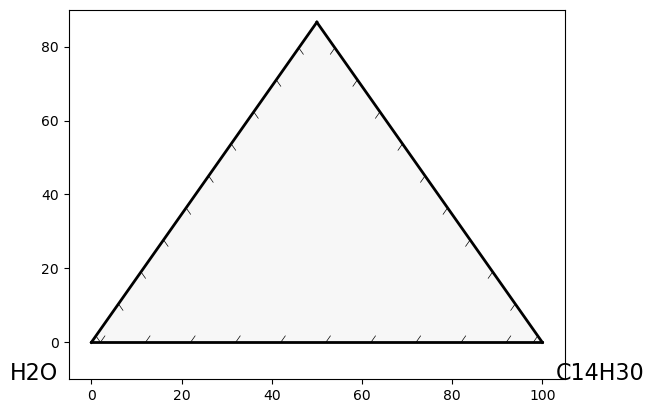

In [15]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Function to create a circular arc
def circular_arc(center, radius, start_angle, end_angle, n=100):
    t = np.linspace(start_angle, end_angle, num=n)
    curve = np.column_stack([radius * np.cos(t) + center[0], radius * np.sin(t) + center[1]])
    
    # Create a Path object for the triangle boundary
    boundary_path = Path([(0, 0), (100, 0), (0, 100), (0, 0)])
    
    # Find the intersection points between the curve and the triangle edges
    intersections = boundary_path.intersects_path(Path(curve))
    
    if not intersections:
        # No intersection with the triangle edges, return the curve as is
        return curve
    
    # Find the first and last intersection points
    start_point = curve[intersections][0]
    end_point = curve[intersections][-1]
    
    # Calculate the start and end angles based on the intersection points
    start_angle_new = np.arctan2(start_point[1] - center[1], start_point[0] - center[0])
    end_angle_new = np.arctan2(end_point[1] - center[1], end_point[0] - center[0])
    
    # Generate the new curve using the updated start and end angles
    t_new = np.linspace(start_angle_new, end_angle_new, num=n)
    curve_new = np.column_stack([radius * np.cos(t_new) + center[0], radius * np.sin(t_new) + center[1]])
    
    return curve_new

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw circular arcs starting from the corner edges of the triangle
    start_points = [(0, 0), (100, 0), (0, 100)]  # Start points for the arcs
    center = (50, 50 / np.sqrt(3))  # Center of the circle
    radius = 50  # Radius of the circle
    start_angles = [5 * np.pi / 6, np.pi / 6, 11 * np.pi / 6]  # Start angles
    end_angles = [np.pi / 6, 5 * np.pi / 6, 7 * np.pi / 6]  # End angles
    for i in range(3):
        # Generate the circular arc
        curve = circular_arc(start_points[i], radius, start_angles[i], end_angles[i])

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]



        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Calculate the midpoint for the label
        midpoint = points[len(points) // 2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()
